# Analyse af COVID-19 data

## Del 1: indlæs data
0. Importere `pandas` og brug pandas.read_csv(path) til at hente data direkte fra GitHub-linket.

    (https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-26-2020.csv)

In [1]:
import pandas as pd

dato = '05-26-2020'

path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-26-2020.csv'

coviddata = pd.read_csv(path)
coviddata['Last_Udate']= pd.to_datetime(coviddata['Last_Update'])

year = coviddata['Last_Udate'].dt.year
month = coviddata['Last_Udate'].dt.month
day = coviddata['Last_Udate'].dt.day
dato = [year, month, day] #'05-26-2020'

print(coviddata['Last_Update'])
coviddata.head()

inputdato = input(f'please enter the desired dato, example (05-26-2020): ')
new_path = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{inputdato}.csv'


coviddata = pd.read_csv(new_path)
coviddata['Last_Udate']= pd.to_datetime(coviddata['Last_Update'])

year = coviddata['Last_Udate'].dt.year
month = coviddata['Last_Udate'].dt.month
day = coviddata['Last_Udate'].dt.day
dato = [year, month, day] #'05-26-2020'

print(coviddata['Last_Update'])
coviddata.head()

0       2020-05-27 02:32:31
1       2020-05-27 02:32:31
2       2020-05-27 02:32:31
3       2020-05-27 02:32:31
4       2020-05-27 02:32:31
               ...         
3446    2020-05-27 02:32:31
3447    2020-05-27 02:32:31
3448    2020-05-27 02:32:31
3449    2020-05-27 02:32:31
3450    2020-05-27 02:32:31
Name: Last_Update, Length: 3451, dtype: object
0       2020-05-27 02:32:31
1       2020-05-27 02:32:31
2       2020-05-27 02:32:31
3       2020-05-27 02:32:31
4       2020-05-27 02:32:31
               ...         
3446    2020-05-27 02:32:31
3447    2020-05-27 02:32:31
3448    2020-05-27 02:32:31
3449    2020-05-27 02:32:31
3450    2020-05-27 02:32:31
Name: Last_Update, Length: 3451, dtype: object


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Last_Udate
0,45001.0,Abbeville,South Carolina,US,2020-05-27 02:32:31,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US",2020-05-27 02:32:31
1,22001.0,Acadia,Louisiana,US,2020-05-27 02:32:31,30.295065,-92.414197,395,18,0,377,"Acadia, Louisiana, US",2020-05-27 02:32:31
2,51001.0,Accomack,Virginia,US,2020-05-27 02:32:31,37.767072,-75.632346,758,11,0,747,"Accomack, Virginia, US",2020-05-27 02:32:31
3,16001.0,Ada,Idaho,US,2020-05-27 02:32:31,43.452658,-116.241552,796,23,0,773,"Ada, Idaho, US",2020-05-27 02:32:31
4,19001.0,Adair,Iowa,US,2020-05-27 02:32:31,41.330756,-94.471059,7,0,0,7,"Adair, Iowa, US",2020-05-27 02:32:31


1. Skimmelæs doc for bibliotek [datetime](https://docs.python.org/3/library/datetime.html)
2. Brug `datetime` til at specificere en dato.
3. Konstruér fil-stien ud fra den dato og hente dataen.
4. Brug `df.head()` og `df.info()` for at få overblik af dataframe. Find ud af, hvilke kolonner der findes (fx Country_Region, Confirmed, Deaths, Recovered).

## Del 2: datarensning

Læs artiklen [Pythonic Data Cleaning With pandas and NumPy](https://realpython.com/python-data-cleaning-numpy-pandas/)
Rense og konstruér dataframe `df`, der indholde kolonerne "Country", "Latitude", "Longitude", "Confirmed", "Deaths", "Recovered" og "Active". 

In [ ]:
import pandas as pd

inputdato = input(f'please enter the desired dato, example (05-26-2020): ')
new_path = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{inputdato}.csv'


coviddata = pd.read_csv(new_path)
coviddata['Last_Udate']= pd.to_datetime(coviddata['Last_Update'])
print(f'this data is from: {inputdato}')
to_drop = ['FIPS', 
           'Admin2', 
           'Province_State', 
           'Last_Update', 
           'Combined_Key', 
           'Last_Udate']

coviddata.drop = coviddata.drop(columns=to_drop, inplace=True, axis=1)
coviddata.head()
print(coviddata['Country_Region'])




this data is from: 05-26-2020
0                   US
1                   US
2                   US
3                   US
4                   US
             ...      
3446    United Kingdom
3447             Nauru
3448       New Zealand
3449            Tuvalu
3450    United Kingdom
Name: Country_Region, Length: 3451, dtype: object


## Del 3: gruppér data
1. Gruppér evt. efter "Country" og summér antal Confirmed og Deaths.
2. Find de 10 lande med flest smittede den dag.

In [ ]:
import pandas as pd

inputdato = input(f'please enter the desired dato, example 05-26-2020: ')
new_path = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{inputdato}.csv'


coviddata = pd.read_csv(new_path)
coviddata['Last_Udate']= pd.to_datetime(coviddata['Last_Update'])
print(f'this data is from: {inputdato}')
to_drop = ['FIPS', 
           'Admin2', 
           'Province_State', 
           'Last_Update', 
           'Combined_Key', 
           'Last_Udate',
           'Lat',
           'Long_']

coviddata.drop = coviddata.drop(columns=to_drop, inplace=True, axis=1)

coviddata['Confirmed'] = pd.to_numeric(coviddata['Confirmed'])
# now we make the same to deaths
coviddata['Deaths'] = pd.to_numeric(coviddata['Deaths'])

coviddata['Confirmed Deaths'] = coviddata['Confirmed'] + coviddata['Deaths']
#print(coviddata.groupby('Country_Region')['Confirmed Deaths'].mean(numeric_only=True))

coviddata = coviddata.groupby('Country_Region').sum()
coviddata.sort_values(by='Confirmed Deaths', ascending=False, inplace=True)
coviddata.head(10)

this data is from: 05-26-2020


,Confirmed,Deaths,Recovered,Active,Confirmed Deaths
Country_Region,,,,,
US,1677229,99392,384902,1582767,1776621
Brazil,395167,24644,158593,366710,419811
Russia,362342,3807,131129,227406,366149
United Kingdom,266594,51331,1161,228308,317925
Italy,230555,32955,144658,52942,263510
Spain,236259,27117,150376,64981,263376
France,184839,28598,65997,90244,213437
Germany,180837,8302,161967,10861,189139
Turkey,158762,4397,121507,32858,163159


## Del 4: Visualisering
Vælg noget plot eksampler fra [seaborn](https://seaborn.pydata.org/examples/index.html) og 
1. Lav et bar plot over de 10 lande med flest smittede.
2. Lav et pie chart over fordelingen af dødsfald mellem de samme 10 lande.

this data is from: 05-26-2020


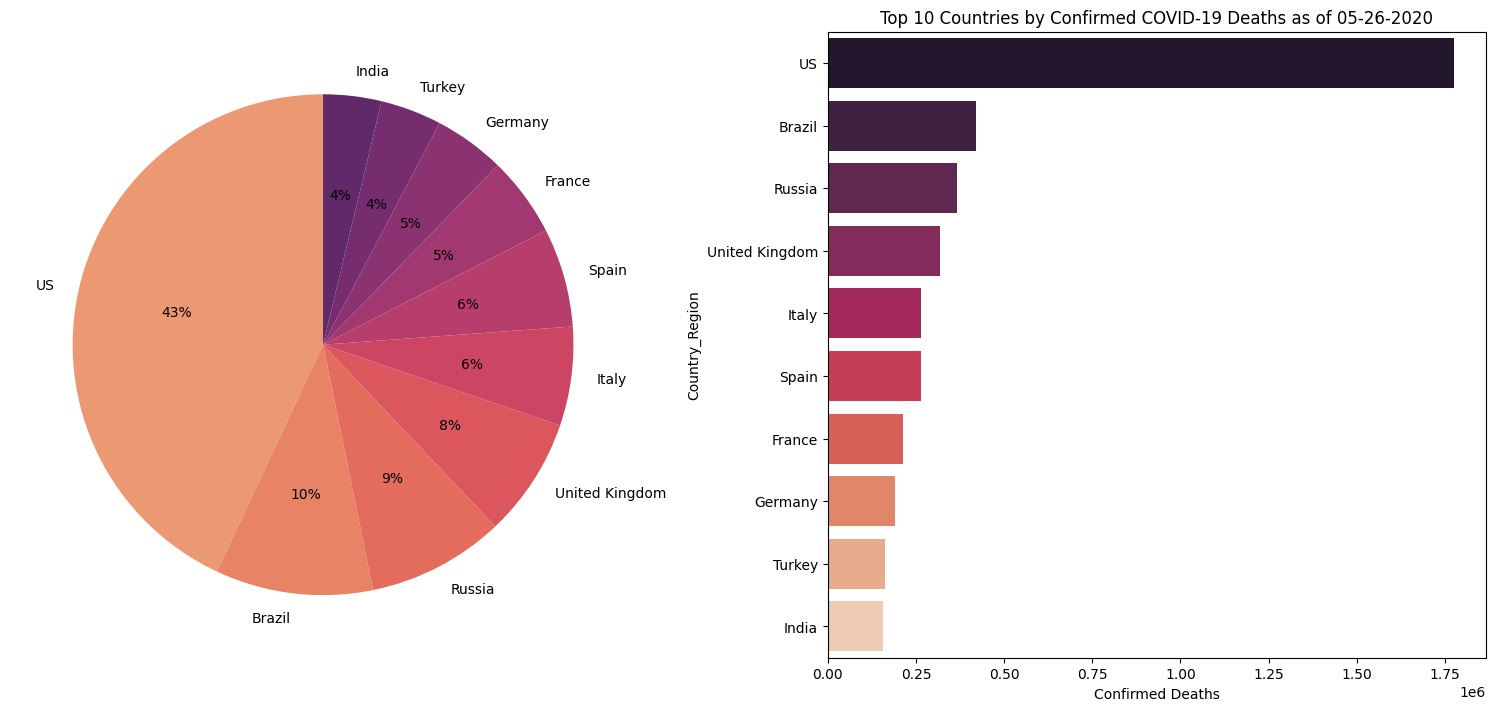

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

inputdato = input(f'please enter the desired dato, example 05-26-2020: ')
new_path = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{inputdato}.csv'


coviddata = pd.read_csv(new_path)
coviddata['Last_Udate']= pd.to_datetime(coviddata['Last_Update'])
print(f'this data is from: {inputdato}')
to_drop = ['FIPS', 
           'Admin2', 
           'Province_State', 
           'Last_Update', 
           'Combined_Key', 
           'Last_Udate',
           'Lat',
           'Long_']

coviddata.drop = coviddata.drop(columns=to_drop, axis=1, inplace=True)

coviddata['Confirmed'] = pd.to_numeric(coviddata['Confirmed'])
# now we make the same to deaths
coviddata['Deaths'] = pd.to_numeric(coviddata['Deaths'])

coviddata['Confirmed Deaths'] = coviddata['Confirmed'] + coviddata['Deaths']
#print(coviddata.groupby('Country_Region')['Confirmed Deaths'].mean(numeric_only=True))

coviddata = coviddata.groupby('Country_Region').sum()
coviddata.sort_values(by='Confirmed Deaths', ascending=False, inplace=True)

top10 = coviddata['Confirmed Deaths'].head(10)

fig, axs = plt.subplots(1, 2, figsize=(15, 7), constrained_layout=True)

pallete = sns.color_palette('flare', n_colors=10, )
axs[0].pie(top10, labels=coviddata.index[:10], colors=pallete, autopct='%.0f%%', startangle=90)
plt.title(f'Top 10 Countries by Confirmed COVID-19 Deaths as of {inputdato}')

sns.barplot(y=coviddata.index[:10], x=coviddata['Confirmed Deaths'][:10], palette='rocket', hue= coviddata.index[:10])



plt.show()

## Ekstra udfordring: Kortvisualisering med Plotly
**Plotly** er et Python-bibliotek til interaktive visualiseringer, der kan bruges direkte i Jupyter Notebooks, Python scripts eller integreres i webapps. Det kan lave alt fra simple linjediagrammer til avancerede 3D-grafer og kort.

**Plotly Express** er en “hurtig” version af **Plotly**, der gør det nemt at lave grafer med få linjer kode. Det minder meget om seaborn eller pandas.plot, men med interaktivitet. 

Kig lidt ind i https://plotly.com/python/plotly-express/ og bruge `plotly.express.choropleth` til at lave et interaktivt verdenskort, hvor landene farves efter antallet af bekræftede COVID-19-tilfælde (eller dødsfald) på en given dato.

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px 

inputdato = input(f'please enter the desired dato, example 05-26-2020: ')
new_path = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{inputdato}.csv'


coviddata = pd.read_csv(new_path)
coviddata['Last_Udate']= pd.to_datetime(coviddata['Last_Update'])
print(f'this data is from: {inputdato}')
to_drop = ['FIPS', 
           'Admin2', 
           'Province_State', 
           'Last_Update', 
           'Combined_Key', 
           'Last_Udate',
           'Lat',
           'Long_']

coviddata.drop = coviddata.drop(columns=to_drop, axis=1, inplace=True)

coviddata['Confirmed'] = pd.to_numeric(coviddata['Confirmed'])
# now we make the same to deaths
coviddata['Deaths'] = pd.to_numeric(coviddata['Deaths'])

coviddata['Confirmed Deaths'] = coviddata['Confirmed'] + coviddata['Deaths']
#print(coviddata.groupby('Country_Region')['Confirmed Deaths'].mean(numeric_only=True))

coviddata = coviddata.groupby('Country_Region', dropna=False).sum().reset_index()
#we use reset_index to turn the index back to a column for plotly to work
coviddata.sort_values(by='Confirmed Deaths', ascending=False, inplace=True)

fig = px.choropleth(
    coviddata, 
    locations= 'Country_Region', # is what column to use for locations
    locationmode= 'country names', # enable country names recognition - from plotly docs
    color='Confirmed Deaths', # the column to be represented by color
    hover_name= 'Country_Region',  # the column to show when on a country
    color_continuous_scale= px.colors.sequential.Oranges,
    range_color=[coviddata['Confirmed Deaths'].min(),coviddata['Confirmed Deaths'].max()])
    
fig.update_layout(title_text=f'Global Confirmed COVID-19 Deaths as of {inputdato}')

fig.show()



this data is from: 05-26-2020


C:\Users\Hanna\AppData\Local\Temp\ipykernel_8796\2797498783.py:36: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.

